In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import sys
import os
# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.features import SelectPFeatures
from src.features import FeaturePlots as fp

In [2]:
sf = SelectPFeatures()

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# Load the data and process each station individually

In [4]:
data_dir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_splits'
train = pd.read_csv(f'{data_dir}/p.train.csv')
test = pd.read_csv(f'{data_dir}/p.test.csv')

In [5]:
# Don't scale the features here - do scaling in each CV fold later on, if needed
# Use linear backaz (sine)
station_feature_dict, feature_names = sf.process_station_datasets(train, test, scaler=False)

YHB
X shape: (2920, 47), y shape: (2920,)
X shape: (734, 47), y shape: (734,)
YDC
X shape: (2509, 47), y shape: (2509,)
X shape: (645, 47), y shape: (645,)
YWB
X shape: (3069, 47), y shape: (3069,)
X shape: (786, 47), y shape: (786,)
MCID
X shape: (2942, 47), y shape: (2942,)
X shape: (771, 47), y shape: (771,)
YHL
X shape: (2739, 47), y shape: (2739,)
X shape: (682, 47), y shape: (682,)
YMR
X shape: (3393, 47), y shape: (3393,)
X shape: (845, 47), y shape: (845,)
YHH
X shape: (4005, 47), y shape: (4005,)
X shape: (1002, 47), y shape: (1002,)
B207
X shape: (1609, 47), y shape: (1609,)
X shape: (380, 47), y shape: (380,)
YPP
X shape: (1334, 47), y shape: (1334,)
X shape: (338, 47), y shape: (338,)
YPM
X shape: (3358, 47), y shape: (3358,)
X shape: (843, 47), y shape: (843,)
YLT
X shape: (1275, 47), y shape: (1275,)
X shape: (291, 47), y shape: (291,)
QLMT
X shape: (792, 47), y shape: (792,)
X shape: (190, 47), y shape: (190,)
H17A
X shape: (527, 47), y shape: (527,)
X shape: (142, 47), 

In [6]:
station_feature_dict_nonlin, feature_names_nonlin = sf.process_station_datasets(train, test, scaler=False, linear_model=False)
feature_names_nonlin

YHB
X shape: (2920, 47), y shape: (2920,)
X shape: (734, 47), y shape: (734,)
YDC


X shape: (2509, 47), y shape: (2509,)
X shape: (645, 47), y shape: (645,)
YWB
X shape: (3069, 47), y shape: (3069,)
X shape: (786, 47), y shape: (786,)
MCID
X shape: (2942, 47), y shape: (2942,)
X shape: (771, 47), y shape: (771,)
YHL
X shape: (2739, 47), y shape: (2739,)
X shape: (682, 47), y shape: (682,)
YMR
X shape: (3393, 47), y shape: (3393,)
X shape: (845, 47), y shape: (845,)
YHH
X shape: (4005, 47), y shape: (4005,)
X shape: (1002, 47), y shape: (1002,)
B207
X shape: (1609, 47), y shape: (1609,)
X shape: (380, 47), y shape: (380,)
YPP
X shape: (1334, 47), y shape: (1334,)
X shape: (338, 47), y shape: (338,)
YPM
X shape: (3358, 47), y shape: (3358,)
X shape: (843, 47), y shape: (843,)
YLT
X shape: (1275, 47), y shape: (1275,)
X shape: (291, 47), y shape: (291,)
QLMT
X shape: (792, 47), y shape: (792,)
X shape: (190, 47), y shape: (190,)
H17A
X shape: (527, 47), y shape: (527,)
X shape: (142, 47), y shape: (142,)
B208
X shape: (526, 47), y shape: (526,)
X shape: (134, 47), y sha

array(['amp_ratio_1', 'amp_ratio_2', 'amp_ratio_3', 'amp_ratio_4',
       'amp_ratio_5', 'amp_ratio_6', 'amp_ratio_7', 'amp_ratio_8',
       'amp_ratio_9', 'amp_ratio_10', 'amp_ratio_11', 'amp_ratio_12',
       'amp_ratio_13', 'amp_ratio_14', 'amp_ratio_15', 'amp_ratio_16',
       'amp_ratio_17', 'amp_ratio_18', 'amp_1', 'amp_2', 'amp_3', 'amp_4',
       'amp_5', 'amp_6', 'amp_7', 'amp_8', 'amp_9', 'amp_10', 'amp_11',
       'amp_12', 'amp_13', 'amp_14', 'amp_15', 'amp_16', 'amp_17',
       'amp_18', 'signal_dominant_frequency', 'signal_dominant_amplitude',
       'noise_max_amplitude', 'signal_max_amplitude', 'signal_variance',
       'noise_variance', 'source_depth_km', 'source_latitude',
       'source_longitude', 'source_receiver_distance_logkm',
       'source_receiver_back_azimuth_deg'], dtype='<U32')

In [7]:
ll_feature_subset = ['amp_ratio_4', 'amp_ratio_5', 'amp_ratio_6', 'amp_ratio_7',
                'amp_1', 'amp_2', 'amp_3', 'amp_4','amp_5', 'signal_variance',
                'signal_dominant_amplitude', 'signal_max_amplitude','signal_dominant_frequency',
                'noise_max_amplitude', 'noise_variance', 
                'source_depth_km', 'source_latitude',
                'source_longitude']

sr_feature_subset = ['amp_ratio_4', 'amp_ratio_5', 'amp_ratio_6', 'amp_ratio_7',
                'amp_1', 'amp_2', 'amp_3', 'amp_4','amp_5', 'signal_variance',
                'signal_dominant_amplitude', 'signal_max_amplitude','signal_dominant_frequency',
                'noise_max_amplitude', 'noise_variance', 
                'source_depth_km', 'source_receiver_distance_logkm',
                'source_receiver_back_azimuth_sine']

sr_nonlin_feature_subset = ['amp_ratio_4', 'amp_ratio_5', 'amp_ratio_6', 'amp_ratio_7',
                'amp_1', 'amp_2', 'amp_3', 'amp_4','amp_5', 'signal_variance',
                'signal_dominant_amplitude', 'signal_max_amplitude','signal_dominant_frequency',
                'noise_max_amplitude', 'noise_variance', 
                'source_depth_km', 'source_receiver_distance_logkm',
                'source_receiver_back_azimuth_deg']

In [8]:
ll_station_feat_dict, ll_feature_names = sf.filter_station_dict_features(station_feature_dict,
                                                                        feature_names,
                                                                        ll_feature_subset)

YHB
X_train: (2920, 18), X_test: (734, 18)
YDC
X_train: (2509, 18), X_test: (645, 18)
YWB
X_train: (3069, 18), X_test: (786, 18)
MCID
X_train: (2942, 18), X_test: (771, 18)
YHL
X_train: (2739, 18), X_test: (682, 18)
YMR
X_train: (3393, 18), X_test: (845, 18)
YHH
X_train: (4005, 18), X_test: (1002, 18)
B207
X_train: (1609, 18), X_test: (380, 18)
YPP
X_train: (1334, 18), X_test: (338, 18)
YPM
X_train: (3358, 18), X_test: (843, 18)
YLT
X_train: (1275, 18), X_test: (291, 18)
QLMT
X_train: (792, 18), X_test: (190, 18)
H17A
X_train: (527, 18), X_test: (142, 18)
B208
X_train: (526, 18), X_test: (134, 18)
LKWY
X_train: (1016, 18), X_test: (278, 18)
FLWY
X_train: (694, 18), X_test: (177, 18)
YGC
X_train: (1725, 18), X_test: (451, 18)
TPMT
X_train: (408, 18), X_test: (97, 18)
YMC
X_train: (3553, 18), X_test: (898, 18)
YML
X_train: (2678, 18), X_test: (638, 18)
B206
X_train: (671, 18), X_test: (175, 18)
B944
X_train: (360, 18), X_test: (95, 18)
YLA
X_train: (681, 18), X_test: (169, 18)
YUF
X_trai

In [9]:
sr_station_feat_dict, sr_feature_names = sf.filter_station_dict_features(station_feature_dict,
                                                                        feature_names,
                                                                        sr_feature_subset)

YHB
X_train: (2920, 18), X_test: (734, 18)
YDC
X_train: (2509, 18), X_test: (645, 18)
YWB
X_train: (3069, 18), X_test: (786, 18)
MCID
X_train: (2942, 18), X_test: (771, 18)
YHL
X_train: (2739, 18), X_test: (682, 18)
YMR
X_train: (3393, 18), X_test: (845, 18)
YHH
X_train: (4005, 18), X_test: (1002, 18)
B207
X_train: (1609, 18), X_test: (380, 18)
YPP
X_train: (1334, 18), X_test: (338, 18)
YPM
X_train: (3358, 18), X_test: (843, 18)
YLT
X_train: (1275, 18), X_test: (291, 18)
QLMT
X_train: (792, 18), X_test: (190, 18)
H17A
X_train: (527, 18), X_test: (142, 18)
B208
X_train: (526, 18), X_test: (134, 18)
LKWY
X_train: (1016, 18), X_test: (278, 18)
FLWY
X_train: (694, 18), X_test: (177, 18)
YGC
X_train: (1725, 18), X_test: (451, 18)
TPMT
X_train: (408, 18), X_test: (97, 18)
YMC
X_train: (3553, 18), X_test: (898, 18)
YML
X_train: (2678, 18), X_test: (638, 18)
B206
X_train: (671, 18), X_test: (175, 18)
B944
X_train: (360, 18), X_test: (95, 18)
YLA
X_train: (681, 18), X_test: (169, 18)
YUF
X_trai

In [10]:
sr_nonlin_station_feat_dict, sr_nonlin_feature_names = sf.filter_station_dict_features(station_feature_dict_nonlin,
                                                                        feature_names_nonlin,
                                                                        sr_nonlin_feature_subset,)

YHB
X_train: (2920, 18), X_test: (734, 18)
YDC
X_train: (2509, 18), X_test: (645, 18)
YWB
X_train: (3069, 18), X_test: (786, 18)
MCID
X_train: (2942, 18), X_test: (771, 18)
YHL
X_train: (2739, 18), X_test: (682, 18)
YMR
X_train: (3393, 18), X_test: (845, 18)
YHH
X_train: (4005, 18), X_test: (1002, 18)
B207
X_train: (1609, 18), X_test: (380, 18)
YPP
X_train: (1334, 18), X_test: (338, 18)
YPM
X_train: (3358, 18), X_test: (843, 18)
YLT
X_train: (1275, 18), X_test: (291, 18)
QLMT
X_train: (792, 18), X_test: (190, 18)
H17A
X_train: (527, 18), X_test: (142, 18)
B208
X_train: (526, 18), X_test: (134, 18)
LKWY
X_train: (1016, 18), X_test: (278, 18)
FLWY
X_train: (694, 18), X_test: (177, 18)
YGC
X_train: (1725, 18), X_test: (451, 18)
TPMT
X_train: (408, 18), X_test: (97, 18)
YMC
X_train: (3553, 18), X_test: (898, 18)
YML
X_train: (2678, 18), X_test: (638, 18)
B206
X_train: (671, 18), X_test: (175, 18)
B944
X_train: (360, 18), X_test: (95, 18)
YLA
X_train: (681, 18), X_test: (169, 18)
YUF
X_trai

In [11]:
assert np.array_equal(ll_station_feat_dict['YHB']['X_train'][:, 0:-2], sr_station_feat_dict['YHB']['X_train'][:, 0:-2]),\
'The filtered datasets are not the same, excluding the location columns'

# Recursive Feature Elimination

Do nested CV for Recursive Feature Elimination (RFE) to select the optimal number of features for each station and (I think?) the optimal hyperparameters.  

Do this for both the feature set with lat/lon and the feature set with SR distance and baz. Then use the location parameters that result in the best performance in the cross validation overall (across all stations). (I would rather just use sr-distance and backazimuth).  

Then, use the optimal number of features from the CV to select the features from each stations training dataset. Compare the selected features.  

Followed example from [Machine Learning Mastery](https://machinelearningmastery.com/rfe-feature-selection-in-python/)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold, KFold, GridSearchCV
from sklearn.feature_selection import RFECV, RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import time

In [13]:
def do_gridsearchcv(gs, Xtrain, ytrain, Xtest):
    """Fit the gridsearch (gs) and make the test predictions"""
    gs_results = gs.fit(Xtrain, ytrain)
    yhat = gs_results.predict(Xtest)
    return gs_results, yhat

def get_gridsearchcv_best_results(gs_results):
    """Return the mean, std, and model parameters from the refit GridSearchCV model"""
    cv_mean = gs_results.best_score_
    cv_std = gs_results.cv_results_['std_test_score'][gs_results.best_index_]
    params = gs_results.best_params_

    return cv_mean, cv_std, params

def get_estimator_importance_getter(estimator_model):
    """Make the importance_getter argument for RFECV given the estimator model type"""
    # Do RFECV to select the optimal number of features
    if 'feature_importances_' in dir(estimator_model):
        importance_getter = 'named_steps.m.feature_importances_'
    elif 'coef_' in dir(estimator_model) or type(estimator_model).__name__ == 'Lasso':
        importance_getter = 'named_steps.m.coef_'
    else:
        raise ValueError('estimator_model must have coef_ or feature_importances_ attribute')

    return importance_getter

def make_simple_pipeline(model, scaler):
    pipe = []
    if scaler:
        pipe.append(('scaler', StandardScaler()))
    
    pipe.append(('m', model))

    return Pipeline(pipe)

def apply_feats_transforms(X, feats_tranform_dict):
    Xt = np.copy(X)
    for ind in feats_tranform_dict.keys():
        assert ind < Xt.shape[1], 'col index is greater than the number of cols'
        Xt[:, ind] = feats_tranform_dict[ind](Xt[:, ind])
        assert ~np.array_equal(Xt[:, ind], X[:, ind]), f'No transform happened for col {ind}'
    return Xt


In [14]:
def nested_rfecv(X,
                 y, 
                 estimator_model,
                 model,
                 param_grid,
                 estimator_scaler=True,
                 model_scaler=True,
                 scoring_method='r2',
                 score_func=r2_score,
                 n_jobs=1,
                 cv_folds_outer=10,
                 cv_folds_inner=5,
                 n_outer_repeats=1,
                 cv_random_state=2652124,
                 estimator_feats_transforms = None,
                 model_feats_transforms = None,
                 run_gridsearchcv_all_feats = False,
                 ):
    """Use SKLearn's RFECV to select the optimal number of features for each 
    outer fold using the estimator model. Use SKLearn's GridSearchCV to find the optimal
    model parameters for the main model using all features and the optimal features. 

    Args:
        X (np.array): Training features
        y (np.array): Training target
        estimator_model (_type_): SKLearn model for selecting features. Must have coef_ or feature_importances_ attribute.
        model (_type_): SKlearn model to train.
        param_grid (dict): Parameter space to search for model.
        estimator_scaler (bool, optional): If the data needs to be scaled using StandardScaler for the estimator model. Defaults to True.
        model_scaler (bool, optional): If the data needs to be scaled using StandardScaler for the model. Defaults to True.
        scoring_method(str, optional): The scoring method to use in RFECV and GridSearchCV. Defaults to 'r2'.
        score_func (function, optional): The function used to evaluate the final models in each fold. Defaults to r2_score.
        n_jobs (int, optional): The number of jobs to use in RFECV and GridSearchCV. Defaults to 1.
        cv_folds_outer (int, optional): The number of folds in the outer KFold CV loop. Defaults to 10.
        cv_folds_inner (int, optional): The number of folds to use in RFECV and GridSearchCV. Defaults to 5.
        n_outer_repeats (int, optional): The number of times to repeat the outer KFold CV. Defaults to 1.
        cv_random_state (int, optional): The random state to use for the inner and outer KFolds. Defaults to 2652124. 
        estimator_feat_transform
    Raises:
        ValueError: If the estimator model does not have oef_ or feature_importances_ attribute.

    Returns:
        dict: Dictionary containing the results from each of the outer folds.
    """

    cv_outer = RepeatedKFold(n_splits=cv_folds_outer, n_repeats=n_outer_repeats, random_state=cv_random_state)
    cv_inner = KFold(n_splits=cv_folds_inner, shuffle=True, random_state=cv_random_state)


    ### Lists to store the results of outer loop
    # Store results of cross-validation and the best model when 
    # using all the features - I probably do not need all of these,
    # really just the test score for comparison
    outer_cv_params_all = []
    outer_cv_mean_all = []
    outer_cv_std_all = []
    outer_test_score_all = []

    # Store the CV results and the best model when using 
    # the selected subset of features
    outer_cv_params_best = []
    outer_cv_mean_best = []
    outer_cv_std_best = []
    outer_test_score_best = []

    # Store the boolean array of features that were kept
    outer_kept_feats = []
    # Store the number of kept features
    outer_n_feats = []

    #### Define the pipelines for RFECV and GridSearchCV ####
    # If the estimator model needs scaled features, add scaling to the 
    # selector pipeline (s_pipe)
    # Each fold in RFECV should be scaled independently
    s_pipe = make_simple_pipeline(estimator_model, estimator_scaler)

    # If the main model needs scaled features, add to the model pipeline (m_pipe)
    # Can use this pipeline in GridCV and evaluating the final models
    m_pipe = make_simple_pipeline(model, model_scaler)
    
    #### Define the grid search ####
    search = GridSearchCV(m_pipe,
                        param_grid=param_grid, 
                        scoring=scoring_method, 
                        n_jobs=n_jobs, 
                        cv=cv_inner,
                        refit=True)
    
    start_outer = time.time()
    for i, data in enumerate(cv_outer.split(X)):
        train_ix, test_ix = data

        start_inner = time.time()

        X_train, X_test = X[train_ix, :], X[test_ix, :]
        y_train, y_test = y[train_ix], y[test_ix]

        # Do RFECV to select the optimal number of features
        importance_getter = get_estimator_importance_getter(estimator_model)

        rfe = RFECV(s_pipe,
                    cv=cv_inner, 
                    scoring=scoring_method,
                    n_jobs=n_jobs,
                    importance_getter=importance_getter)
        
        if estimator_feats_transforms is None:
            rfe.fit(X_train, y_train)
        else:
            rfe.fit(apply_feats_transforms(X_train, estimator_feats_transforms), y_train)

        # Get the best features from the RFECV
        n_feats = rfe.n_features_
        best_feats = rfe.support_
        outer_kept_feats.append(best_feats)
        outer_n_feats.append(n_feats)
        
        # Do model param. grid search when using all features
        if model_feats_transforms is not None:
            X_train = apply_feats_transforms(X_train, model_feats_transforms)
            X_test = apply_feats_transforms(X_test, model_feats_transforms)
            
        if run_gridsearchcv_all_feats:
            gs_results_all, yhat_all = do_gridsearchcv(search, X_train, y_train, X_test)
            score_all = score_func(y_test, yhat_all)
            outer_test_score_all.append(score_all)
            # Could probably remove the next 4 lines... I don't think I really need to save these
            cv_mean_all, cv_std_all, params_all = get_gridsearchcv_best_results(gs_results_all)
            outer_cv_mean_all.append(cv_mean_all)
            outer_cv_std_all.append(cv_std_all)
            outer_cv_params_all.append(params_all)

        # Do GridCV using the optimal number of features 
        X_train = X_train[:, best_feats]
        X_test = X_test[:, best_feats]
        gs_results_best, yhat_best = do_gridsearchcv(search, X_train, y_train, X_test)
        score_best = score_func(y_test, yhat_best)
        outer_test_score_best.append(score_best)

        cv_mean_best, cv_std_best, params_best = get_gridsearchcv_best_results(gs_results_best)
        outer_cv_mean_best.append(cv_mean_best)
        outer_cv_std_best.append(cv_std_best)
        outer_cv_params_best.append(params_best)

        end_inner = time.time()
        
        if run_gridsearchcv_all_feats:
            print(f'Fold {i}: test score ({n_feats} best feats): {score_best:0.3f}, test score (all feats): {score_all:0.3f}, diff: {(score_best - score_all):0.3f}, time: {end_inner-start_inner:0.2f} s, best model params: {params_best}')
        else:
            print(f'Fold {i}: test score ({n_feats} best feats): {score_best:0.3f}, time: {end_inner-start_inner:0.2f} s, best model params: {params_best}')

    outer_time = (time.time() - start_outer)
    print(f'Total time: {outer_time:0.2f} s ({outer_time/60:0.2f} min)')

    results_dict = {'n_feats': np.array(outer_n_feats),
                    'optfts_bool': np.array(outer_kept_feats),
                    'test_score_optfts': np.array(outer_test_score_best),
                    'cv_mean_optfts': np.array(outer_cv_mean_best),
                    'cv_std_optfts': np.array(outer_cv_std_best),
                    'cv_params_optfts': np.array(outer_cv_params_best),
                    'test_score_allfts': np.array(outer_test_score_all),
                    'cv_mean_allfts': np.array(outer_cv_mean_all),
                    'cv_std_allfts': np.array(outer_cv_std_all),
                    'cv_params_allfts': np.array(outer_cv_params_all),
                    }

    return results_dict

In [15]:
# Functions for looking at which features are important for a single station

def count_feature_usage(cv_optfts_bool, feature_names):
    """Count the number of times a feature is selected in the outer folds.

    Args:
        cv_optfts_bool (np.array): np.array or list of the boolean feature selection arrays
        feature_names (list): The names of the features

    Returns:
        pd.DataFrame: DataFrame with columns of feature names and their count.
    """
    feat_sum = (cv_optfts_bool[0])*1
    for f_i in cv_optfts_bool[1:]:
        feat_sum += (f_i)*1

    return pd.DataFrame({'Feature':feature_names, 'cvcnt':feat_sum}).sort_values('cvcnt', ascending=False)

def import_feats_by_usage(feat_usage_df, thresh=None):
    """Get list of features that occur in at least thresh folds. 
    thresh default is 1/2 the max count."""
    if thresh is None:
        thresh = feat_usage_df['cvcnt'].max()//2

    return feat_usage_df[feat_usage_df['cvcnt'] >= thresh]['Feature'].values

def important_feats_by_best_model(results_dict, feature_names, use_max_score=True):
    """Get the features selected in the fold with the highest test score"""
    if use_max_score:
        best_model_score = np.max(results_dict['test_score_optfts'])
    else:
        best_model_score = np.min(results_dict['test_score_optfts'])

    best_model_ind = np.where(results_dict['test_score_optfts'] == best_model_score)[0][0]

    return feature_names[results_dict['optfts_bool'][best_model_ind]]

def important_feats_by_cv_mean(results_dict, feature_names, use_max_score=True):
    """Get the features selected in the fold with the highest mean cv score"""
    if use_max_score:
        best_model_score = np.max(results_dict['cv_mean_optfts'])
    else:
        best_model_score = np.min(results_dict['cv_mean_optfts'])

    best_model_ind = np.where(results_dict['cv_mean_optfts'] == best_model_score)[0][0]

    return feature_names[results_dict['optfts_bool'][best_model_ind]]

def important_feats_by_largest_gain(results_dict, feature_names):
    """Get the features selected in the fold that has the largest performance gain compared
    to the model trained with all features"""
    diff = np.subtract(results_dict['test_score_optfts'], results_dict['test_score_allfts'])
    best_model_ind = np.argmax(diff)
    return feature_names[results_dict['optfts_bool'][best_model_ind]]

def combine_important_features(impfeats_list, cvcnt_df=None):
    """Count the number of times a feature was selected as important using different criteria.

    Args:
        impfeats_list (list): List of lists or arrays containing feature names.
        cvcnt_df (pd.DataFrame, optional): DataFrame with the counts per fold 
        (from count_feature_usage) to merge the with. Defaults to None.

    Returns:
        pd.DataFrame: DataFrame with columns Feature (feature name) and impcnt (number of times the feature 
        occured in impfeats_list). If cvcnt_df is provided, there will also be a cvcnt column (number of times
        the feature was selected as important in the outer folds).
    """
    selectedfts, selectedcnts = np.unique(np.concatenate(impfeats_list), return_counts=True)
    imp_df = pd.DataFrame({'Feature':selectedfts, 'impcnt':selectedcnts}).sort_values('impcnt', ascending=False)
    if cvcnt_df is not None:
        imp_df = cvcnt_df.merge(imp_df, on='Feature', how='left').fillna(0).astype({'impcnt': int})

    return imp_df

# Find important features using Decision Trees, Random Forests, SVM-linear, and Lasso Regression for SVM-RBF and SVM-linear 
Trees are scale invariant, others are not.  
For SVM-RBF use C, gamma in log(-3, 3) space.   
Use default settings for estimators.
I tried Lasso and it did not work at all-I must have messed something up? It kept selecting one feature...

In [16]:
# param_grid =  [{'m__C': [0.1, 1, 10], 
#                 'm__epsilon': [0.1, 1, 10], 
#                 'm__gamma': [0.1, 0.01, 0.001], 
#                 'm__kernel': ['rbf']}]

In [17]:
# svr_Cspace = 10**np.arange(-2, 3, dtype=float)
# svr_gspace = 10**np.arange(-2, 3, dtype=float)
svr_Cspace = [0.1, 1, 10, 100]
svr_gspace = [1, 0.1, 0.01, 0.001]
estimator_models = [DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), SVR(kernel='linear')]
estimator_scalers = [False, False, False, True]
run_gridsearchcv_all = [True, False, False, False]
print(svr_Cspace, svr_gspace)

[0.1, 1, 10, 100] [1, 0.1, 0.01, 0.001]


In [18]:
### Set Parameters ###
# Training data to use
X_ll = ll_station_feat_dict['YNR']['X_train']
y_ll = ll_station_feat_dict['YNR']['y_train']
# The model to used to estimate feature importance 
#estimator_model =  DecisionTreeRegressor()
# Boolean - True if data for estimator_model needs to be scaled
#estimator_scaler = False
# The main model to fit
model = SVR()
# Boolean - True if data for model needs to be scaled 
model_scaler = True
# The scoring method to use in RFECV and GridCV
scoring_method = 'r2'
# The function used to evaluate the performance on the test model
score_func = r2_score
# The parameter space for GridCV to search
# Decrease upper-limit of C for linear model because 100 is very slow 
param_grid = [
    {'m__C': svr_Cspace[:-1], 'm__kernel': ['linear']},
    {'m__C': svr_Cspace, 'm__gamma': svr_gspace, 'm__kernel': ['rbf']},
]
# The number of jobs for RFECV and GridCV to use
n_jobs = 10
# number of folds for outer CV
cv_folds_outer = 10
# number of folds for inner cv
cv_folds_inner = 5
n_outer_repeats = 1
#####################

ynr_rfecv_ll_results_dict = {}
for i in range(len(estimator_models)):
    estimator_model = estimator_models[i]
    estimator_scaler = estimator_scalers[i]
    mname = type(estimator_model).__name__
    print(mname, 'Estimator Scaler:', estimator_scaler)
    ynr_rfecv_ll_results = nested_rfecv(X_ll, y_ll, estimator_model, model, param_grid, 
                                        estimator_scaler=estimator_scaler, 
                                        model_scaler=model_scaler, 
                                        scoring_method=scoring_method,
                                        score_func=score_func,
                                        n_jobs=n_jobs, 
                                        cv_folds_outer=cv_folds_outer, 
                                        cv_folds_inner=cv_folds_inner,
                                        n_outer_repeats=n_outer_repeats,
                                        run_gridsearchcv_all_feats=run_gridsearchcv_all[i])
    ynr_rfecv_ll_results_dict[mname] = ynr_rfecv_ll_results

DecisionTreeRegressor Estimator Scaler: False
Fold 0: test score (11 best feats): 0.906, test score (all feats): 0.908, diff: -0.003, time: 60.84 s, best model params: {'m__C': 10, 'm__gamma': 0.1, 'm__kernel': 'rbf'}
Fold 1: test score (7 best feats): 0.908, test score (all feats): 0.907, diff: 0.002, time: 53.43 s, best model params: {'m__C': 10, 'm__gamma': 0.1, 'm__kernel': 'rbf'}
Fold 2: test score (9 best feats): 0.915, test score (all feats): 0.889, diff: 0.026, time: 58.11 s, best model params: {'m__C': 10, 'm__gamma': 0.1, 'm__kernel': 'rbf'}
Fold 3: test score (8 best feats): 0.902, test score (all feats): 0.902, diff: -0.001, time: 55.12 s, best model params: {'m__C': 10, 'm__gamma': 0.1, 'm__kernel': 'rbf'}
Fold 4: test score (9 best feats): 0.911, test score (all feats): 0.893, diff: 0.018, time: 54.54 s, best model params: {'m__C': 10, 'm__gamma': 0.1, 'm__kernel': 'rbf'}
Fold 5: test score (8 best feats): 0.897, test score (all feats): 0.893, diff: 0.004, time: 55.31 s, 

Text(0.5, 0, 'Estimator Model')

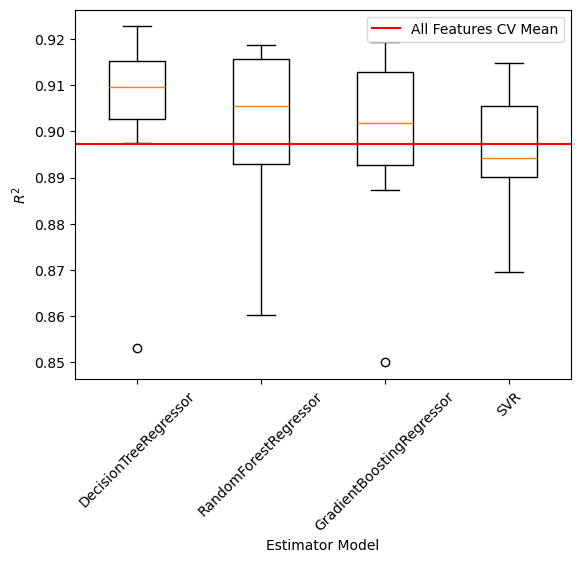

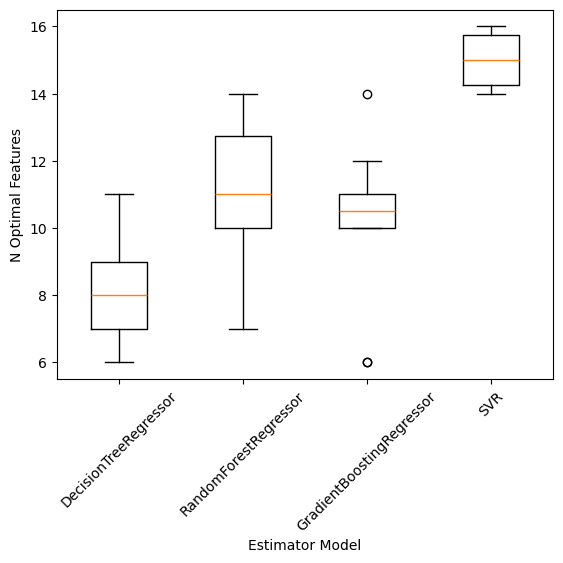

In [23]:
xlabels = []
test_scores = []
n_feats = []
for i, key in enumerate(ynr_rfecv_ll_results_dict.keys()):
    ynr_rfecv_ll_results = ynr_rfecv_ll_results_dict[key]
    test_scores.append(ynr_rfecv_ll_results['test_score_optfts'])
    n_feats.append(ynr_rfecv_ll_results['n_feats'])
    xlabels.append(key)
    if key == 'DecisionTreeRegressor':
        all_feats_mean_score = np.mean(ynr_rfecv_ll_results['test_score_allfts'])

    

fig = plt.figure()
plt.boxplot(test_scores);
plt.axhline(all_feats_mean_score, color='r', label='All Features CV Mean')
plt.xticks(range(1, len(xlabels)+1), labels=xlabels, rotation=45)
plt.ylabel(r"$R^2$")
plt.xlabel('Estimator Model')
plt.legend()

fig = plt.figure()
plt.boxplot(n_feats);
plt.xticks(range(1, len(xlabels)+1), labels=xlabels, rotation=45)
plt.ylabel(r"N Optimal Features")
plt.xlabel('Estimator Model')


In [24]:
import json
# from this example https://stackoverflow.com/a/47626762
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

In [25]:
with open('rfecv_results_latlon.json', 'w') as fp:
    json.dump(ynr_rfecv_ll_results_dict, fp, indent=4, cls=NumpyEncoder)

In [33]:
ynr_impfeat_cnts_dfs = []
for i, key in enumerate(ynr_rfecv_ll_results_dict.keys()):
    ynr_rfecv_ll_results = ynr_rfecv_ll_results_dict[key]
    ynr_feat_usage_df = count_feature_usage(ynr_rfecv_ll_results['optfts_bool'], ll_feature_names)
    if_usage = import_feats_by_usage(ynr_feat_usage_df, thresh=(cv_folds_outer*n_outer_repeats)//2)
    #print(if_usage)
    if_best = important_feats_by_best_model(ynr_rfecv_ll_results, ll_feature_names)
    #print(if_best)
    if_cvmean = important_feats_by_cv_mean(ynr_rfecv_ll_results, ll_feature_names)
    #print(if_cvmean)
    ynr_impfeat_cnts_df = combine_important_features([if_usage, if_best], ynr_feat_usage_df)
    ynr_impfeat_cnts_dfs.append(ynr_impfeat_cnts_df)

In [29]:
ynr_impfeat_cnts_dfs[0]

,Feature,cvcnt,impcnt
0,amp_1,10,2
1,amp_2,10,2
2,source_depth_km,10,2
3,source_latitude,10,2
4,source_longitude,10,2
5,signal_variance,10,2
6,amp_3,9,2
7,signal_dominant_amplitude,4,1
8,amp_ratio_4,3,0
9,amp_4,2,0


In [30]:
ynr_impfeat_cnts_dfs[1]

,Feature,cvcnt,impcnt
0,amp_1,10,2
1,amp_2,10,2
2,source_depth_km,10,2
3,source_latitude,10,2
4,amp_3,10,2
5,signal_variance,10,2
6,source_longitude,10,2
7,amp_5,9,2
8,amp_4,8,2
9,amp_ratio_4,8,2


In [31]:
ynr_impfeat_cnts_dfs[2]

,Feature,cvcnt,impcnt
0,amp_1,10,2
1,amp_2,10,2
2,source_depth_km,10,2
3,source_latitude,10,2
4,source_longitude,10,2
5,signal_variance,10,2
6,signal_dominant_frequency,8,2
7,amp_3,8,2
8,amp_4,8,2
9,amp_ratio_4,6,2


In [32]:
ynr_impfeat_cnts_dfs[3]

,Feature,cvcnt,impcnt
0,amp_ratio_4,10,2
1,amp_ratio_5,10,2
2,amp_ratio_6,10,2
3,amp_ratio_7,10,2
4,amp_1,10,2
5,amp_2,10,2
6,amp_4,10,2
7,amp_5,10,2
8,signal_max_amplitude,10,2
9,signal_dominant_amplitude,10,2


# Try a tree as the model

# Use SR-dist and back-azimuth instead of lat/lon

In [19]:
X_sr_lin = sr_station_feat_dict['YNR']['X_train']
y_sr_lin = sr_station_feat_dict['YNR']['y_train']
X_sr_nonlin = sr_nonlin_station_feat_dict['YNR']['X_train']
y_sr_nonlin = sr_nonlin_station_feat_dict['YNR']['y_train']
assert np.array_equal(X_sr_lin[:, -1], np.sin(X_sr_nonlin[:, -1]*np.pi/180))

In [20]:
# Check transform function works
baz_transform = {X_sr_nonlin.shape[1]-1: lambda x: np.sin(x*np.pi/180)}
tmp = apply_feats_transforms(X_sr_nonlin, baz_transform)
assert np.array_equal(X_sr_lin[:, -1], tmp[:, -1])

In [ ]:
# Try linear SVM
param_grid = [
    {'m__C': svr_Cspace[:-1], 'm__kernel': ['linear']},
]
estimator_feats_transforms = [None, None, baz_transform, baz_transform]
model_feats_transforms = baz_transform

In [ ]:
# Try RBF (non-linear) SVM
param_grid = [
    {'m__C': svr_Cspace, 'm__gamma': svr_gspace, 'm__kernel': ['rbf']},
]
model_feats_transforms = None

In [21]:
# See how long it takes/results when applying the baz transform in the loop
ynr_rfecv_sr_transform_results = nested_rfecv(X_sr_nonlin, y_sr_nonlin, estimator_model, model, param_grid, 
                                            estimator_scaler=estimator_scaler, 
                                            model_scaler=model_scaler, 
                                            scoring_method=scoring_method,
                                            score_func=score_func,
                                            n_jobs=n_jobs, 
                                            cv_folds_outer=cv_folds_outer, 
                                            cv_folds_inner=cv_folds_inner,
                                            n_outer_repeats=n_outer_repeats, 
                                            estimator_feats_transforms=baz_transform,
                                            model_feats_transforms=baz_transform)

Fold 0: test score (9 best feats): 0.913, test score (all feats): 0.913, diff: 0.001, time: 31.57 s, best model params: {'m__C': 10, 'm__epsilon': 0.1, 'm__gamma': 0.1, 'm__kernel': 'rbf'}
Fold 1: test score (11 best feats): 0.904, test score (all feats): 0.902, diff: 0.002, time: 31.04 s, best model params: {'m__C': 10, 'm__epsilon': 0.1, 'm__gamma': 0.1, 'm__kernel': 'rbf'}
Fold 2: test score (8 best feats): 0.891, test score (all feats): 0.912, diff: -0.021, time: 30.31 s, best model params: {'m__C': 10, 'm__epsilon': 0.1, 'm__gamma': 0.1, 'm__kernel': 'rbf'}
Fold 3: test score (9 best feats): 0.892, test score (all feats): 0.890, diff: 0.003, time: 29.30 s, best model params: {'m__C': 10, 'm__epsilon': 0.1, 'm__gamma': 0.1, 'm__kernel': 'rbf'}
Fold 4: test score (12 best feats): 0.893, test score (all feats): 0.906, diff: -0.013, time: 33.20 s, best model params: {'m__C': 10, 'm__epsilon': 0.1, 'm__gamma': 0.1, 'm__kernel': 'rbf'}
Fold 5: test score (9 best feats): 0.897, test scor

In [22]:
sr_impfeat_cnt_list = []
for i in range(2):
    ynr_rfecv_sr_results = ynr_rfecv_sr_results_list[i] 
    feature_names = sr_feature_names
    if i > 0:
        feature_names = sr_nonlin_feature_names
    ynr_feat_usage_df = count_feature_usage(ynr_rfecv_sr_results['optfts_bool'], feature_names)
    if_usage = import_feats_by_usage(ynr_feat_usage_df, thresh=(cv_folds_outer*n_outer_repeats)//2)
    print(if_usage)
    if_best = important_feats_by_best_model(ynr_rfecv_sr_results, feature_names)
    print(if_best)
    if_cvmean = important_feats_by_cv_mean(ynr_rfecv_sr_results, feature_names)
    print(if_cvmean)
    if_gain = important_feats_by_largest_gain(ynr_rfecv_sr_results, feature_names)
    print(if_gain)
    ynr_impfeat_cnts_df = combine_important_features([if_usage, if_best], ynr_feat_usage_df)
    sr_impfeat_cnt_list.append(ynr_impfeat_cnts_df)

['amp_1' 'amp_2' 'source_depth_km' 'source_receiver_distance_logkm'
 'amp_4' 'signal_variance' 'source_receiver_back_azimuth_sine' 'amp_3'
 'signal_dominant_amplitude' 'amp_5']
['amp_1' 'amp_2' 'amp_3' 'amp_4' 'signal_dominant_amplitude'
 'signal_variance' 'source_depth_km' 'source_receiver_distance_logkm'
 'source_receiver_back_azimuth_sine']
['amp_1' 'amp_2' 'amp_3' 'amp_4' 'signal_dominant_amplitude'
 'signal_variance' 'source_depth_km' 'source_receiver_distance_logkm'
 'source_receiver_back_azimuth_sine']
['amp_1' 'amp_2' 'amp_3' 'amp_4' 'amp_5' 'signal_dominant_amplitude'
 'signal_variance' 'source_depth_km' 'source_receiver_distance_logkm'
 'source_receiver_back_azimuth_sine']
['amp_1' 'amp_2' 'source_depth_km' 'source_receiver_distance_logkm'
 'amp_4' 'amp_3' 'source_receiver_back_azimuth_deg' 'signal_variance'
 'signal_dominant_amplitude' 'amp_5']
['amp_1' 'amp_2' 'amp_3' 'amp_4' 'amp_5' 'signal_dominant_amplitude'
 'signal_variance' 'source_depth_km' 'source_receiver_distance_

In [23]:
sr_impfeat_cnt_list[0]

,Feature,cvcnt,impcnt
0,amp_1,10,2
1,amp_2,10,2
2,source_depth_km,10,2
3,source_receiver_distance_logkm,10,2
4,amp_4,10,2
5,signal_variance,10,2
6,source_receiver_back_azimuth_sine,9,2
7,amp_3,9,2
8,signal_dominant_amplitude,7,2
9,amp_5,6,1


In [24]:
sr_impfeat_cnt_list[1]

,Feature,cvcnt,impcnt
0,amp_1,10,2
1,amp_2,10,2
2,source_depth_km,10,2
3,source_receiver_distance_logkm,10,2
4,amp_4,10,2
5,amp_3,10,2
6,source_receiver_back_azimuth_deg,10,2
7,signal_variance,10,2
8,signal_dominant_amplitude,8,2
9,amp_5,6,2


In [25]:
# See how long it takes/results when applying the baz transform in the loop
ynr_rfecv_sr_transform_results = nested_rfecv(X_sr_nonlin, y_sr_nonlin, estimator_model, model, param_grid, 
                                            estimator_scaler=estimator_scaler, 
                                            model_scaler=model_scaler, 
                                            scoring_method=scoring_method,
                                            score_func=score_func,
                                            n_jobs=n_jobs, 
                                            cv_folds_outer=cv_folds_outer, 
                                            cv_folds_inner=cv_folds_inner,
                                            n_outer_repeats=n_outer_repeats, 
                                            estimator_feats_transforms=baz_transform,
                                            model_feats_transforms=baz_transform)

Fold 0: test score (10 best feats): 0.919, test score (all feats): 0.913, diff: 0.006, time: 31.68 s, best model params: {'m__C': 10, 'm__epsilon': 0.1, 'm__gamma': 0.1, 'm__kernel': 'rbf'}
Fold 1: test score (8 best feats): 0.902, test score (all feats): 0.902, diff: -0.000, time: 30.91 s, best model params: {'m__C': 10, 'm__epsilon': 0.1, 'm__gamma': 0.1, 'm__kernel': 'rbf'}
Fold 2: test score (13 best feats): 0.918, test score (all feats): 0.912, diff: 0.005, time: 31.71 s, best model params: {'m__C': 10, 'm__epsilon': 0.1, 'm__gamma': 0.1, 'm__kernel': 'rbf'}
Fold 3: test score (10 best feats): 0.896, test score (all feats): 0.890, diff: 0.006, time: 32.51 s, best model params: {'m__C': 10, 'm__epsilon': 0.1, 'm__gamma': 0.1, 'm__kernel': 'rbf'}
Fold 4: test score (11 best feats): 0.899, test score (all feats): 0.906, diff: -0.007, time: 28.35 s, best model params: {'m__C': 10, 'm__epsilon': 0.1, 'm__gamma': 0.1, 'm__kernel': 'rbf'}
Fold 5: test score (11 best feats): 0.896, test s